In [37]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import numpy as np

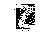

In [38]:
from PIL import Image
import numpy
basewidth = 50
pil_image = PIL.Image.open('image_sample/Z/1.png').convert('1') 
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img

Populating the interactive namespace from numpy and matplotlib
image_sample/3/
image_sample/4/
image_sample/9/
image_sample/A/
image_sample/A/
image_sample/H/
image_sample/H/
image_sample/H/
image_sample/H/
image_sample/Q/


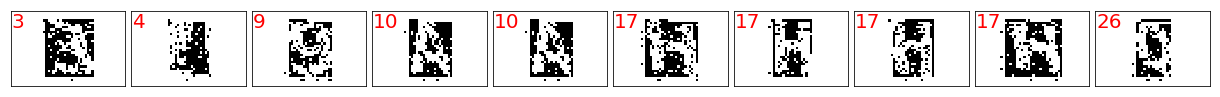

In [39]:

%pylab inline
import os
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(0,35):
    for img in os.listdir('image_sample/{}/'.format(number[i])):
        print('image_sample/{}/'.format(number[i]))
        pil_image = PIL.Image.open('image_sample/{}/{}'.format(number[i], img)).convert('1') 
    
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        
        ax = fig.add_subplot(10, 12, cnt+1, xticks=[], yticks=[])
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize = 20)        
        cnt = cnt + 1
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [40]:
import numpy
digit_ary  = numpy.array(digits)

In [41]:
digit_ary.shape

(10, 1650)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 3000)
mlp.fit(X_scaled,labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
predicted = mlp.predict(X_scaled)

In [45]:
predicted

array([ 3,  4,  9, 10, 10, 17, 17, 17, 17, 26])

In [46]:
target = numpy.array(labels)

In [47]:
predicted == target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Populating the interactive namespace from numpy and matplotlib


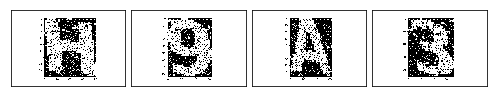

In [48]:
%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1') 
    ax = fig.add_subplot(10, 12, idx+1, xticks=[], yticks=[])
    ax.imshow(pil_image,cmap=plt.cm.binary,interpolation='nearest')

In [49]:

%pylab inline
import os
data = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1') 
    
    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])


Populating the interactive namespace from numpy and matplotlib


<Figure size 1440x1440 with 0 Axes>

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [102]:
mlp.predict(data_scaled)

array([17,  9, 10,  3])

In [103]:
intArray = mlp.predict(data_scaled)

In [104]:
strArray =[]
for i in range(4):
    changeToStr = str(intArray[i])
    strArray.append(changeToStr)

strArray

['17', '9', '10', '3']

In [112]:
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for index1 in range(4):
    strArray[index1] = number[intArray[index1]]

strArray

['H', '9', 'A', '3']